# Data Science Internship by Internsavy

Name - Manoj Patil

Task 1 

Use classification technique for
prediction of Graduate Admissions 
from an Indian perspective.



In [1]:
# Importing required libraries 


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data set

df=pd.read_csv("IS_Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Determine label and Features (Y&X)

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
features=['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Chance of Admit ']

In [11]:
x=df[features]
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,0.92
1,2,324,107,4,4.0,4.5,8.87,0.76
2,3,316,104,3,3.0,3.5,8.00,0.72
3,4,322,110,3,3.5,2.5,8.67,0.80
4,5,314,103,2,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,0.82
396,397,325,107,3,3.0,3.5,9.11,0.84
397,398,330,116,4,5.0,4.5,9.45,0.91
398,399,312,103,3,3.5,4.0,8.78,0.67


In [12]:
y=df.Research
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Research, Length: 400, dtype: int64

# Splitting the dataset into training and Testing

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
250,251,320,104,3,3.0,2.5,8.57,0.74
63,64,315,107,2,4.0,3.0,8.50,0.56
312,313,311,107,4,4.5,4.5,9.00,0.78
159,160,297,100,1,1.5,2.0,7.90,0.52
283,284,321,111,3,2.5,3.0,8.90,0.80
...,...,...,...,...,...,...,...,...
323,324,305,102,2,2.0,2.5,8.18,0.62
192,193,322,114,5,4.5,4.0,8.94,0.86
117,118,290,104,4,2.0,2.5,7.46,0.45
47,48,339,119,5,4.5,4.0,9.70,0.89


In [15]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
132,133,309,105,5,3.5,3.5,8.56,0.71
309,310,308,110,4,3.5,3.0,8.60,0.70
341,342,326,110,3,3.5,3.5,8.76,0.79
196,197,306,105,2,3.0,2.5,8.26,0.73
246,247,316,105,3,3.0,3.5,8.73,0.72
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0.75
135,136,314,109,4,3.5,4.0,8.77,0.82
390,391,314,102,2,2.0,2.5,8.24,0.64
264,265,325,110,2,3.0,2.5,8.76,0.75


In [16]:
y_train

250    1
63     1
312    1
159    0
283    1
      ..
323    0
192    1
117    0
47     0
172    1
Name: Research, Length: 300, dtype: int64

In [17]:
y_test

132    0
309    0
341    1
196    0
246    0
      ..
146    0
135    1
390    0
264    1
364    1
Name: Research, Length: 100, dtype: int64

# Train the Algorithm

In [18]:
# Using decision tree model


from sklearn.tree import DecisionTreeClassifier

In [19]:
dt=DecisionTreeClassifier()

In [20]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# Predecting the test data set(x_test)

In [21]:
y_pred=dt.predict(x_test) 

In [22]:
y_pred# model predicted

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [23]:
y_test

132    0
309    0
341    1
196    0
246    0
      ..
146    0
135    1
390    0
264    1
364    1
Name: Research, Length: 100, dtype: int64

# Evaluating the Performance of Model

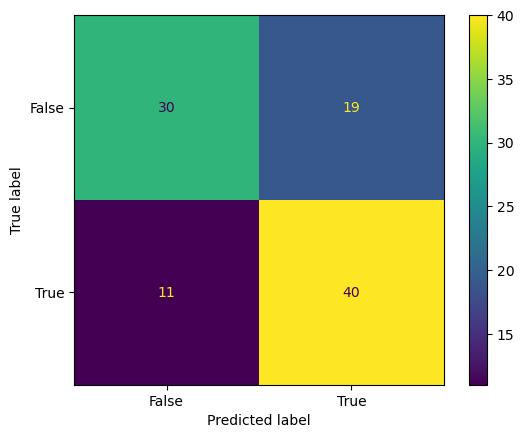

In [24]:
import matplotlib.pyplot as plt
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
confusion_matrix.plot()
plt.show()


In [25]:
#Accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

70.0

In [26]:
#Precision

from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average=None)*100

array([73.17073171, 67.79661017])

In [27]:
#Recall


from sklearn.metrics import recall_score

recall_score(y_test,y_pred,average=None)*100

array([61.2244898 , 78.43137255])

In [28]:
# F1 Score

from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average=None)*100 

array([66.66666667, 72.72727273])